In [92]:
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4

In [93]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (8,5)

# Compare our NetCDF format to WHP NetCDF Format
# For Expocode 74JC20150110

# Read in our NetCDF File

## Read in our file to an xarray dataset

In [94]:
xr_ctd = xr.open_dataset('74JC20150110.nc')
xr_ctd

<xarray.Dataset>
Dimensions:          (N_level: 2418, N_profile: 30)
Coordinates:
    EXPOCODE         (N_profile) object ...
    SECT_ID          (N_profile) object ...
    STNNBR           (N_profile) object ...
    CASTNO           (N_profile) object ...
    DATE             (N_profile) object ...
    TIME             (N_profile) object ...
    LATITUDE         (N_profile) float64 ...
    LONGITUDE        (N_profile) float64 ...
    DEPTH            (N_profile) float64 ...
    DATETIME         (N_profile) datetime64[ns] ...
Dimensions without coordinates: N_level, N_profile
Data variables:
    CTDPRS           (N_profile, N_level) float64 ...
    CTDPRS_FLAG_W    (N_profile, N_level) float32 ...
    CTDTMP           (N_profile, N_level) float64 ...
    CTDTMP_FLAG_W    (N_profile, N_level) float32 ...
    CTDSAL           (N_profile, N_level) float64 ...
    CTDSAL_FLAG_W    (N_profile, N_level) float32 ...
    CTDOXY           (N_profile, N_level) float64 ...
    CTDOXY_FLAG_W    (

## Read in our file as a netCDF Dataset

In [95]:
xr_nc_ctd = netCDF4.Dataset('74JC20150110.nc', 'r')
xr_nc_ctd

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    contributer_name: "Firing, Yvonne","King, Brian A."
    contributer_role: Chief Scientist
    creator_name: CCHDO
    dimensions(sizes): N_profile(30), N_level(2418)
    variables(dimensions): float64 CTDPRS(N_profile,N_level), int8 CTDPRS_FLAG_W(N_profile,N_level), float64 CTDTMP(N_profile,N_level), int8 CTDTMP_FLAG_W(N_profile,N_level), float64 CTDSAL(N_profile,N_level), int8 CTDSAL_FLAG_W(N_profile,N_level), float64 CTDOXY(N_profile,N_level), int8 CTDOXY_FLAG_W(N_profile,N_level), float64 CTDXMISS(N_profile,N_level), int8 CTDXMISS_FLAG_W(N_profile,N_level), float64 CTDFLUOR(N_profile,N_level), int8 CTDFLUOR_FLAG_W(N_profile,N_level), <class 'str'> EXPOCODE(N_profile), <class 'str'> SECT_ID(N_profile), <class 'str'> STNNBR(N_profile), <class 'str'> CASTNO(N_profile), <class 'str'> DATE(N_profile), <class 'str'> TIME(N_profile), float64 LATITUDE(N_profile), float64 LONGITUDE(N_profile), float64 D

# Read in WHP NetCDF format for same Cruise (1st profile)

## Read in WHP NetCDF into an xarray dataset

In [96]:
whp_xr_ctd = xr.open_dataset('./74JC20150110_nc_ctd/74JC20150110_00001_00001_ctd.nc')
whp_xr_ctd

<xarray.Dataset>
Dimensions:         (latitude: 1, longitude: 1, pressure: 176, time: 1)
Coordinates:
  * pressure        (pressure) float64 3.0 5.0 7.0 9.0 11.0 13.0 15.0 17.0 ...
  * time            (time) datetime64[ns] 2015-01-13T07:31:00
  * latitude        (latitude) float32 -61.05073
  * longitude       (longitude) float32 -54.58947
Data variables:
    pressure_QC     (pressure) int16 ...
    temperature     (pressure) float64 ...
    temperature_QC  (pressure) int16 ...
    salinity        (pressure) float64 ...
    salinity_QC     (pressure) int16 ...
    oxygen          (pressure) float64 ...
    oxygen_QC       (pressure) int16 ...
    CTDXMISS        (pressure) float64 ...
    CTDXMISS_QC     (pressure) int16 ...
    CTDFLUOR        (pressure) float64 ...
    CTDFLUOR_QC     (pressure) int16 ...
    woce_date       (time) int32 ...
    woce_time       (time) int16 ...
    station         |S40 ...
    cast            |S40 ...
Attributes:
    EXPOCODE:                   74JC2

In [97]:
whp_ctd = netCDF4.Dataset('./74JC20150110_nc_ctd/74JC20150110_00001_00001_ctd.nc', 'r')
whp_ctd

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    EXPOCODE: 74JC20150110
    Conventions: COARDS/WOCE
    WOCE_VERSION: 3.0
    WOCE_ID: SR1B
    DATA_TYPE: WOCE CTD
    STATION_NUMBER: 1
    CAST_NUMBER: 1
    BOTTOM_DEPTH_METERS: 359
    Creation_Time: 2017-01-23T17:58:42.103027Z
    ORIGINAL_HEADER: CTD,20170123CCHSIOSEE
# Data source: http://cchdo.ucsd.edu/cruise/74JC20150110
# LATITUDE_UNITS = degrees_North
# LONGITUDE_UNITS = degrees_East
# TIME_UNITS = HHMM
# DATE_UNITS: YYYYMMDD
# As per Y.Firing,  CCHDO changed CTDOXY,CTDXMISS, CTDFLUOR flags from 2 (acceptable measurement) to 1 (not calibrated)
# CTD,20170112OCPNOCYLF - Originator Time Stamp 
#    SHIP: James Clark Ross
#    Cruise JR306; SR1B
#    Region: Drake Passage; ~56W
#    EXPOCODE: 74JC20150110
#    DATES: 20150110 - 20150120
#    Chief Scientist: B. King, NOCS ; Y. Firing, NOCS
#    Supported by NERC National Capability
#    30 stations with 24-place rosette
#    CT

## Read variables from xarray

In [98]:
stnbr = xr_ctd['STNNBR']
stnbr

<xarray.DataArray 'STNNBR' (N_profile: 30)>
array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30'], dtype=object)
Coordinates:
    EXPOCODE   (N_profile) object ...
    SECT_ID    (N_profile) object ...
    STNNBR     (N_profile) object '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' ...
    CASTNO     (N_profile) object ...
    DATE       (N_profile) object ...
    TIME       (N_profile) object ...
    LATITUDE   (N_profile) float64 ...
    LONGITUDE  (N_profile) float64 ...
    DEPTH      (N_profile) float64 ...
    DATETIME   (N_profile) datetime64[ns] ...
Dimensions without coordinates: N_profile
Attributes:
    units:      number
    long_name:  Station Number

In [99]:
xr_pressure = xr_ctd['CTDPRS']
xr_pressure

<xarray.DataArray 'CTDPRS' (N_profile: 30, N_level: 2418)>
array([[ 3.,  5.,  7., ..., nan, nan, nan],
       [ 3.,  5.,  7., ..., nan, nan, nan],
       [ 3.,  5.,  7., ..., nan, nan, nan],
       ...,
       [ 5.,  7.,  9., ..., nan, nan, nan],
       [ 7.,  9., 11., ..., nan, nan, nan],
       [ 7.,  9., 11., ..., nan, nan, nan]])
Coordinates:
    EXPOCODE   (N_profile) object ...
    SECT_ID    (N_profile) object ...
    STNNBR     (N_profile) object '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' ...
    CASTNO     (N_profile) object ...
    DATE       (N_profile) object ...
    TIME       (N_profile) object ...
    LATITUDE   (N_profile) float64 ...
    LONGITUDE  (N_profile) float64 ...
    DEPTH      (N_profile) float64 ...
    DATETIME   (N_profile) datetime64[ns] ...
Dimensions without coordinates: N_profile, N_level
Attributes:
    units:    DBAR

### Read in first profile

In [100]:
xr_ctd_profile_1 = xr_ctd['CTDPRS'].sel(N_profile = 0)
xr_ctd_profile_1

<xarray.DataArray 'CTDPRS' (N_level: 2418)>
array([ 3.,  5.,  7., ..., nan, nan, nan])
Coordinates:
    EXPOCODE   object ...
    SECT_ID    object ...
    STNNBR     <U1 '1'
    CASTNO     object ...
    DATE       object ...
    TIME       object ...
    LATITUDE   float64 ...
    LONGITUDE  float64 ...
    DEPTH      float64 ...
    DATETIME   datetime64[ns] ...
Dimensions without coordinates: N_level
Attributes:
    units:    DBAR

## Read variables from xarray netCDF

In [101]:
xr_nc_ctd_pressure = xr_nc_ctd.variables['CTDPRS']  
xr_nc_ctd_pressure

<class 'netCDF4._netCDF4.Variable'>
float64 CTDPRS(N_profile, N_level)
    _FillValue: nan
    units: DBAR
    coordinates: CASTNO EXPOCODE LATITUDE DATETIME STNNBR LONGITUDE TIME SECT_ID DATE DEPTH
unlimited dimensions: 
current shape = (30, 2418)
filling on

### Read in first profile

In [102]:
xr_nc_ctd_pressure[0]

masked_array(data=[3.0, 5.0, 7.0, ..., --, --, --],
             mask=[False, False, False, ...,  True,  True,  True],
       fill_value=nan)

## Read variables from WHP netCDF

In [103]:
whp_pressure = whp_ctd.variables['pressure']  
whp_pressure

<class 'netCDF4._netCDF4.Variable'>
float64 pressure(pressure)
    long_name: pressure
    positive: down
    units: decibar
    data_min: 3.0
    data_max: 353.0
    C_format: %8.1f
    WHPO_Variable_Name: CTDPRS
    OBS_QC_VARIABLE: pressure_QC
unlimited dimensions: 
current shape = (176,)
filling on, default _FillValue of 9.969209968386869e+36 used

## Plot variables from xarray as profiles vs levels

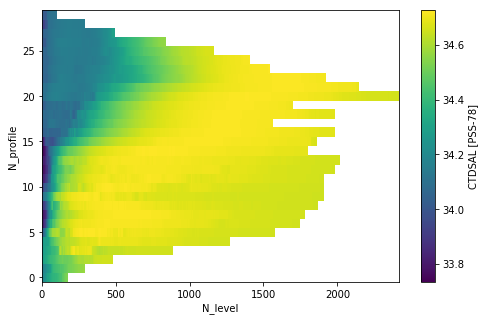

In [104]:
xr_ctd['CTDSAL'].plot()

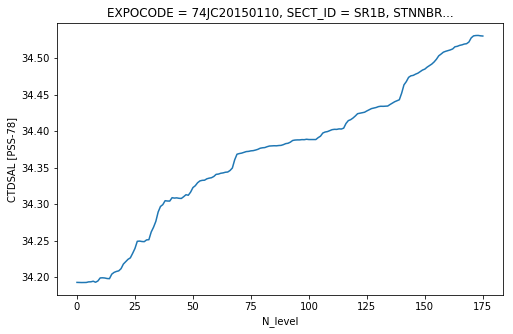

In [105]:
xr_ctd['CTDSAL'].sel(N_profile = 0).plot()

In [106]:
xr_salinity = xr_ctd['CTDSAL'].sel(N_profile = 0)
xr_pressure = xr_ctd['CTDPRS'].sel(N_profile = 0)

### Plot as salinity vs pressure

[Text(0,0.5,'Salinity'), Text(0.5,0,'Pressure'), Text(0.5,1,'N_profile = 0')]

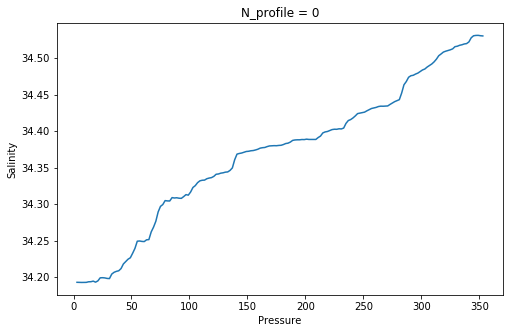

In [107]:
fig, ax = plt.subplots()
ax.plot(xr_pressure, xr_salinity)
ax.set(xlabel='Pressure', ylabel='Salinity',
       title='N_profile = 0')

## Plot variables from WHP netCDF

In [108]:
whp_pressure = whp_ctd.variables['pressure']
whp_salinity = whp_ctd.variables['salinity']

[Text(0,0.5,'Salinity'), Text(0.5,0,'Pressure'), Text(0.5,1,'N_profile = 0')]

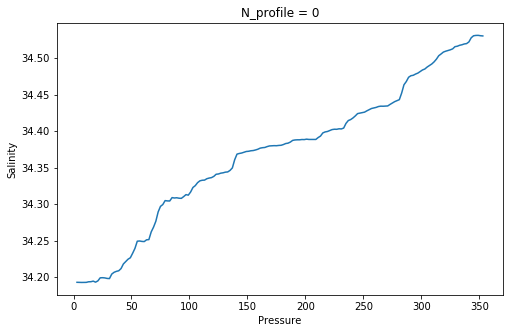

In [109]:
fig, ax = plt.subplots()
ax.plot(whp_pressure, whp_salinity)
ax.set(xlabel='Pressure', ylabel='Salinity',
       title='N_profile = 0')